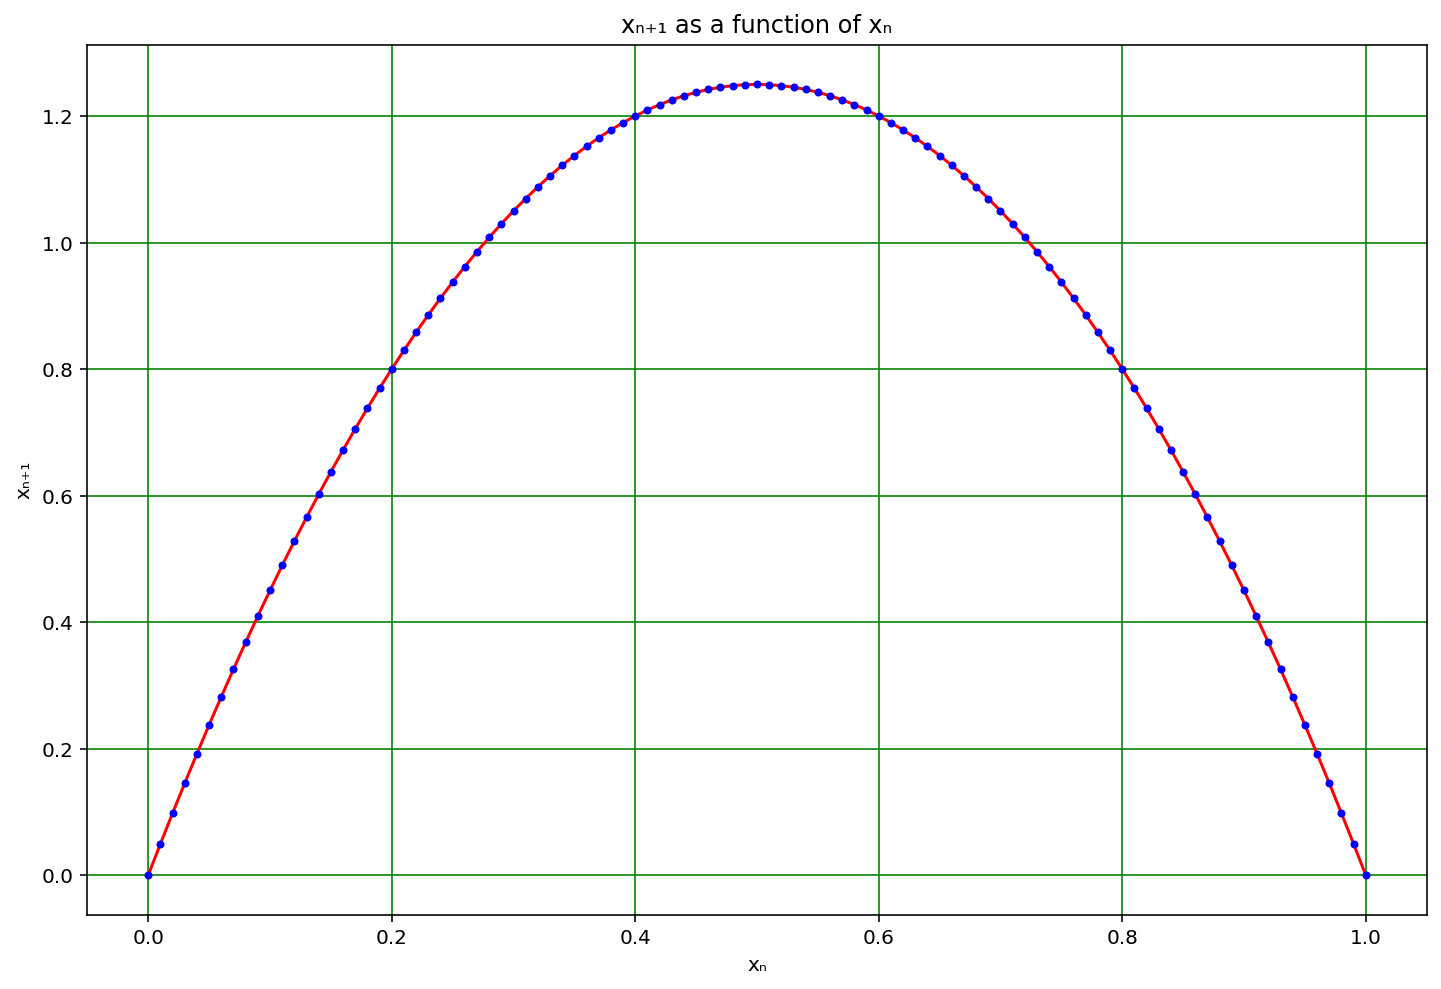

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
xN = np.linspace(0.0, 1.0, 101)
r = 5
xNPlusOne = r * xN*(1 - xN)

#
plt.figure(figsize = (12, 8))
plt.title("x\u2099\u208a\u2081 as a function of x\u2099")
plt.plot(xN, xNPlusOne, color = 'r', linestyle = '-', marker = '.', markerfacecolor = 'b', markeredgecolor = 'b')
plt.xlabel("x\u2099")
plt.ylabel("x\u2099\u208a\u2081")
plt.grid(color = 'g')
plt.savefig('Initial Logistics Map Graph')
plt.show()

0.49999999999999994


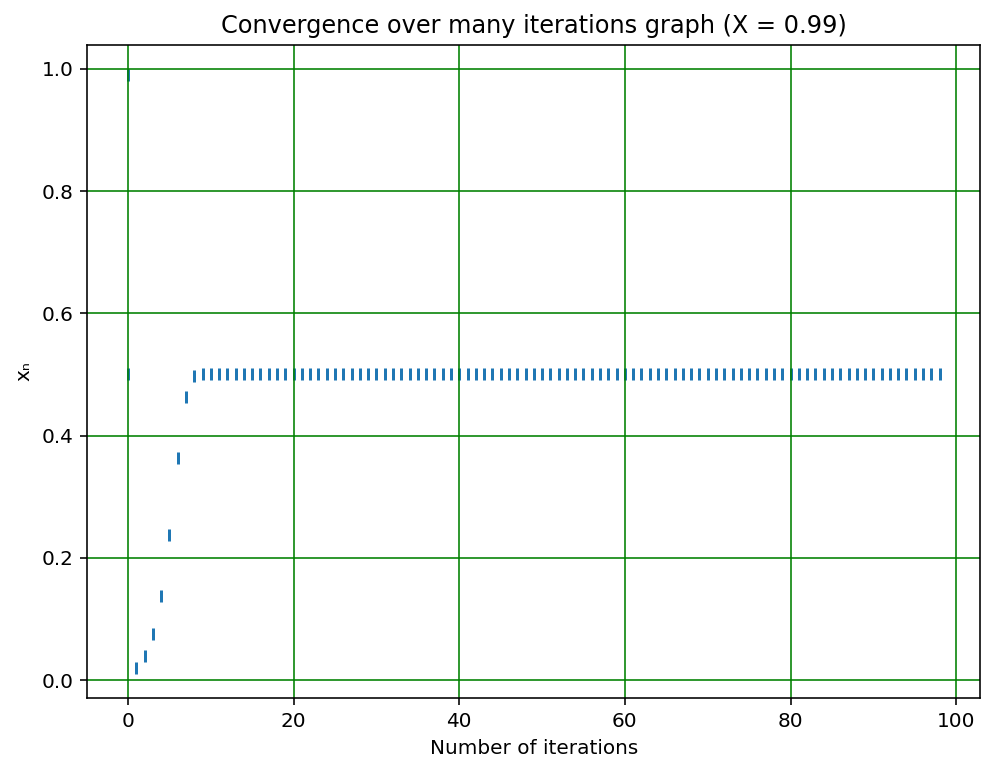

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Dripping tap example - constants alpha and beta
Npoints = 100
Time = np.zeros(Npoints) #Create array for time between drops
Time[0] = 0.99 #Initial time value - anything below 1, has no effect on outcome
xAxis = np.zeros(Npoints) #Create array to store iteration number for the graph
index = 0 #Set index counter to 0
alpha = 2#Growth factor - changeable
beta = 1#Decay factor - changeable

for index in range (0, Npoints - 1): #repeat for as long as index value is between 0 and 99
    Time[index+1] = alpha*Time[index] * (1 - (beta*Time[index])) #Next time value using chaos theory equation and current time value
    xAxis[index] = index #Record iteration number in array
    index += 1 #Increase index value by 1, eventually will end the loop
    
print(Time[index])
    
#print(Time) #debugging print statement
#print(index) #debugging print statement
#Graph plotting block for time between drops after each iteration/drop
fig = plt.figure(figsize = (8, 6))
plt.title("Convergence over many iterations graph (X = 0.99)")
plt.xlabel("Number of iterations")
plt.ylabel("x\u2099")
plt.scatter(xAxis, Time, marker = '|') # Using scatter plot as it just shows the plotted points
#plt.plot(xAxis, Time, color = 'b', linestyle = '-')
plt.savefig('Convergence over many iterations graph')
plt.grid(color = 'g')


/tmp/ipykernel_867/855675114.py:60: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimise" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('Bifurcation diagram 1', optimise = True)


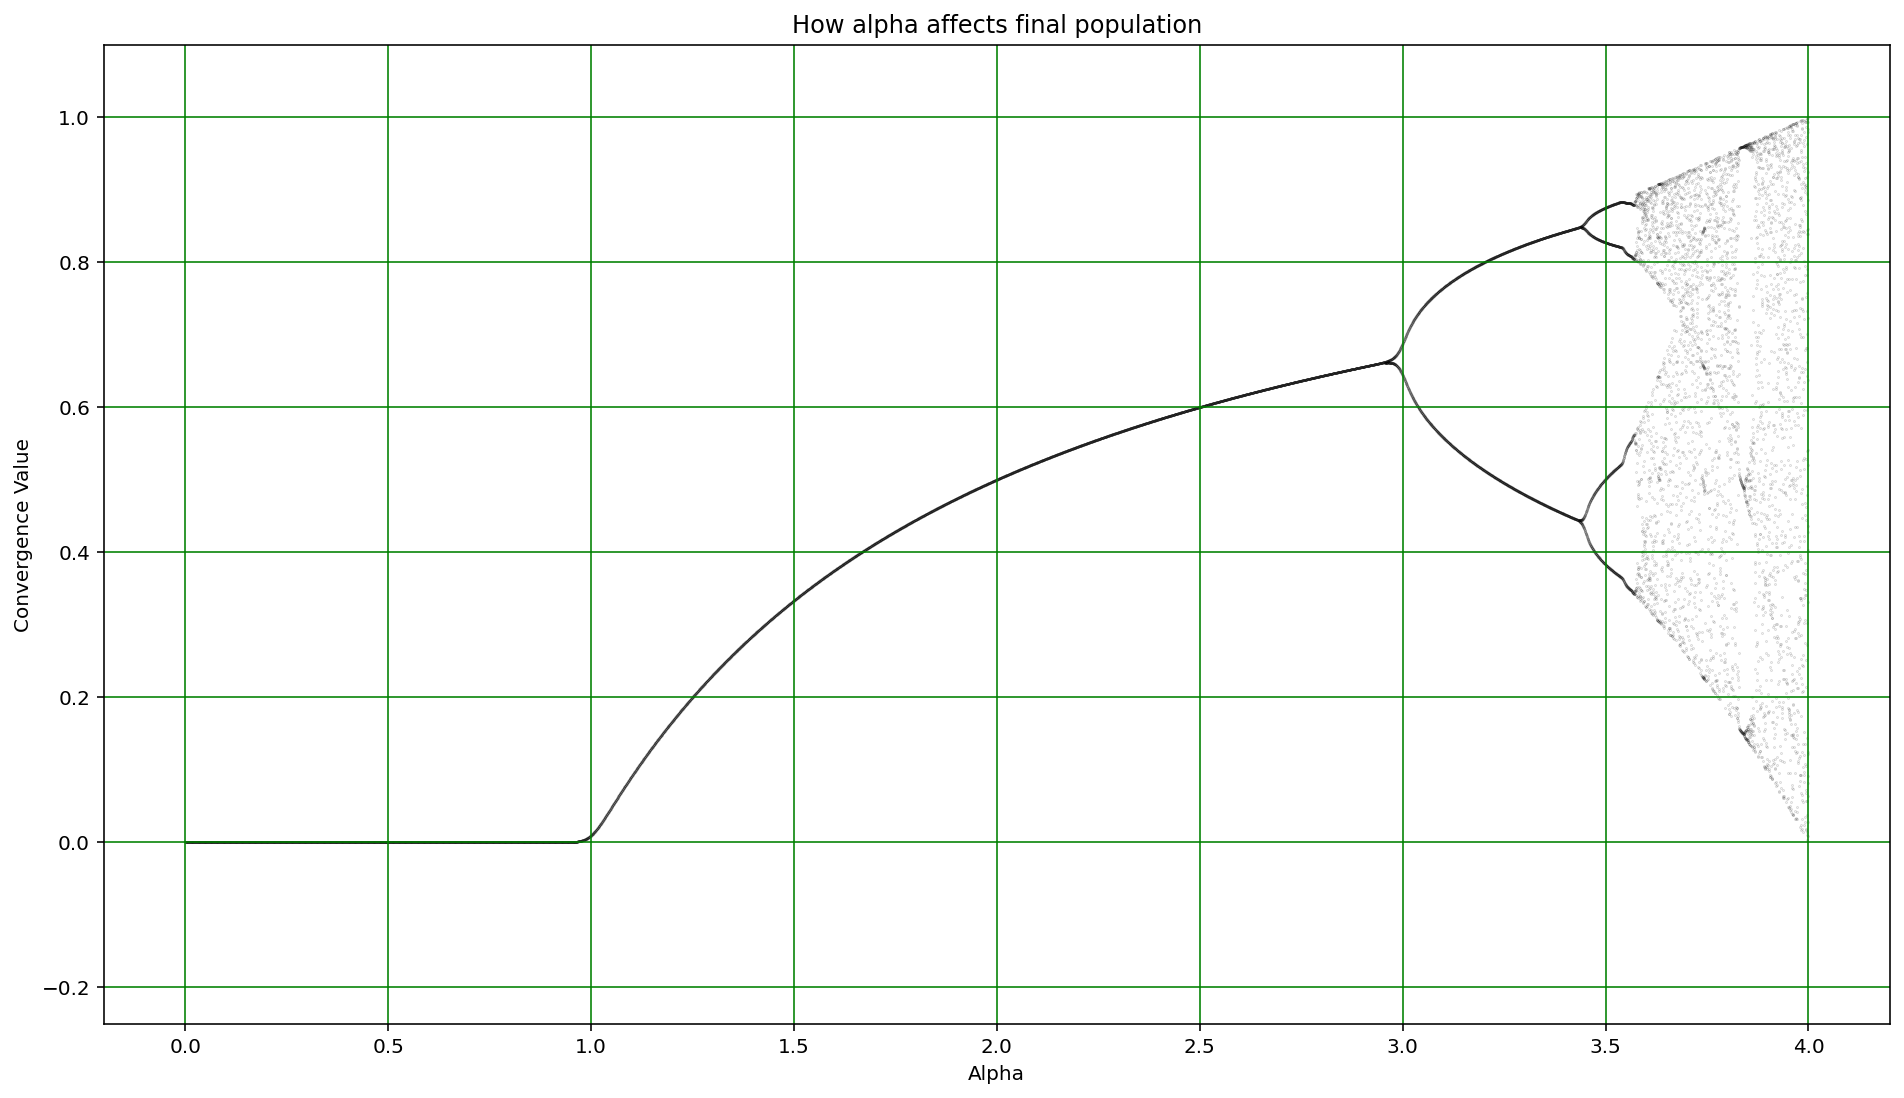

In [3]:
from math import isclose

Npoints = 100
Npoints_i = 10000

alpha_i = np.linspace(0, 4, Npoints_i)

index_i = 0
Population = np.zeros(Npoints) #Create array for time between drops
Population[0] = 0.6 #Initial time value - anything below 1, has no effect on outcome
Final_pop = np.zeros(Npoints_i)
Final_pop_1 = np.zeros(Npoints_i)
Final_pop_2 = np.zeros(Npoints_i)
Final_pop_3 = np.zeros(Npoints_i)
beta = 1

for index_i in range (0, Npoints_i):
    index = 0
    Population[0] = 0.6 #Initial time value - anything below 1, has no effect on outcome
    for index in range (0, Npoints - 1): #repeat for as long as index value is between 0 and 99
        Population[index+1] = alpha_i[index_i]*Population[index] * (1 - (beta*Population[index])) #Next population value using chaos theory equation and current population
        
        index += 1 #Increase index value by 1, eventually will end the loop
    
    Final_pop[index_i] = Population[index]
    if isclose(Population[index-1], Population[index], abs_tol = 1e-3) == True: #Population[index-1] == Population[index]:
        Final_pop_1[index_i] = - 1
        #print(-1)
    else:
        Final_pop_1[index_i] = Population[index - 1]
        
    
    if isclose(Population[index-2], Population[index], abs_tol = 1e-3) == True or isclose(Population[index-2], Population[index-1], abs_tol = 1e-3) == True:#Population[index-2] == (Population[index] or Population[index-1]):
        Final_pop_2[index_i] = - 1
        #print(-2)
    else:
        Final_pop_2[index_i] = Population[index - 2]
    
    if (isclose(Population[index-3], Population[index], abs_tol = 1e-3) == True) or (isclose(Population[index-3], Population[index-2], abs_tol = 1e-3) == True) or (isclose(Population[index-3], Population[index-1], abs_tol = 1e-3) == True): #Population[index-3] == (Population[index] or Population[index-1] or Population[index-2]):
        Final_pop_3[index_i] = - 1
        #print(-3)
    else:
        Final_pop_3[index_i] = Population[index - 3]
    index_i += 1

fig = plt.figure(figsize = (16, 9))
plt.title("How alpha affects final population")
plt.xlabel("Alpha")
plt.ylabel("Convergence Value")
plt.scatter(alpha_i, Final_pop, marker = '.', color = 'k', s = 0.25, alpha = .25) # Using scatter plot as it just shows the plotted points
plt.scatter(alpha_i, Final_pop_1, marker = '.', color = 'k', s = 0.25, alpha = .25) # Using scatter plot as it just shows the plotted points
plt.scatter(alpha_i, Final_pop_2, marker = '.', color = 'k', s = 0.25, alpha = .25) # Using scatter plot as it just shows the plotted points
plt.scatter(alpha_i, Final_pop_3, marker = '.', color = 'k', s = 0.25, alpha = .25) # Using scatter plot as it just shows the plotted points
#plt.plot(alpha_i, Final_pop, color = 'b', linestyle = '-')
#plt.plot(alpha_i, Final_pop_1, color = 'b', linestyle = '-')
#plt.plot(alpha_i, Final_pop_2, color = 'b', linestyle = '-')
#plt.plot(alpha_i, Final_pop_3, color = 'b', linestyle = '-')
plt.ylim(bottom = -0.25)
plt.grid(color = 'g')
plt.savefig('Bifurcation diagram 1', optimise = True)

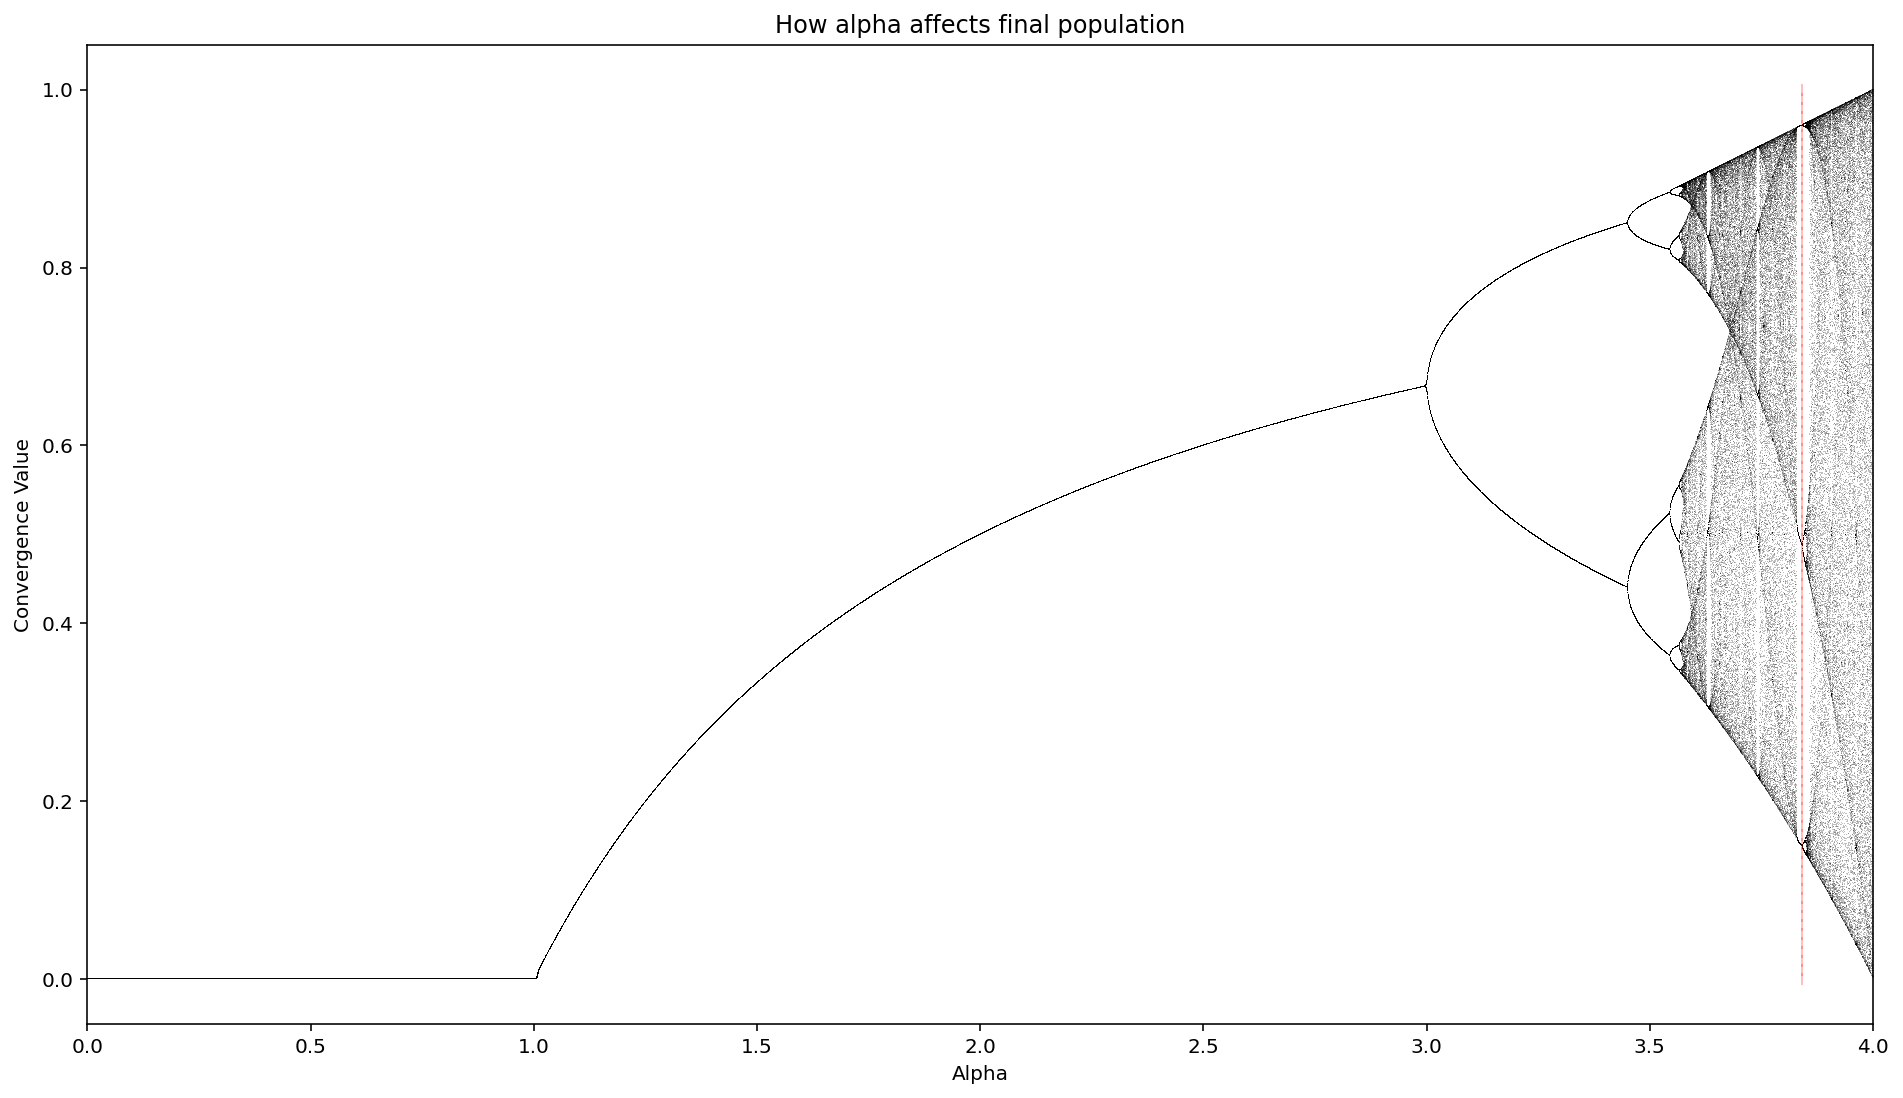

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
def func(r, xN):
    return r * xN*(1 - xN)
#
nPoints = 10000
r = np.linspace(0, 4.0, nPoints)
xN = 0.00001
iterations = 1000
last = 100
#
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 9),
                               sharex=True)
for i in range(iterations):
    xN = func(r, xN)
    if i >= (iterations - last):
        ax1.plot(r, xN, ',k', alpha=.25)
ax1.set_xlim(0, 4)

marker = 4*0.96
x = np.ones(100)*marker
y = np.linspace(0, 1, 100)
ax1.plot(x, y, '|r', alpha=.25)

ax1.set_title("How alpha affects final population")
plt.xlabel("Alpha")
plt.ylabel("Convergence Value")
plt.savefig("Bifurcation diagram 2")

## Lorenz Attractor

/tmp/ipykernel_867/2615107455.py:23: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = "3d")


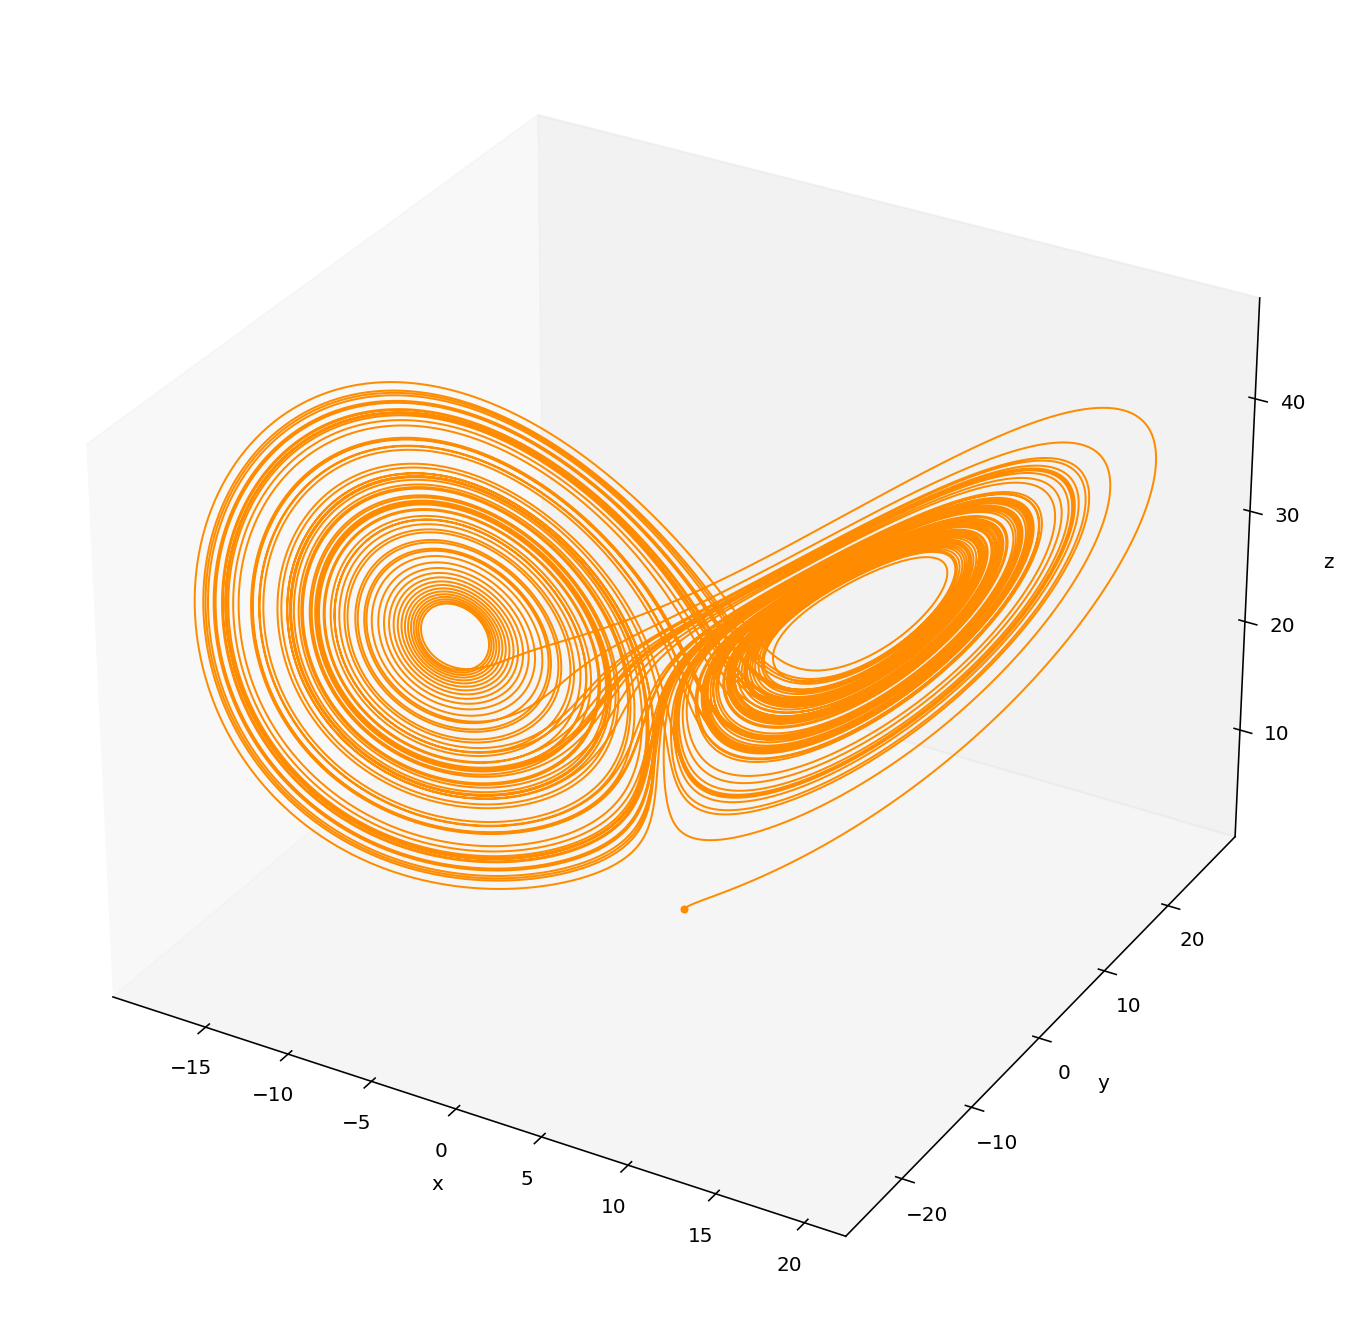

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-10.082547154719919 -10.940501794001996 27.937799912066097
-9.369114911169625 -9.491891821664353 27.9426526968698
Time to execute 1.5476746559143066 Seconds


/tmp/ipykernel_867/2615107455.py:51: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimise" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('xPositions.png', optimise = True)


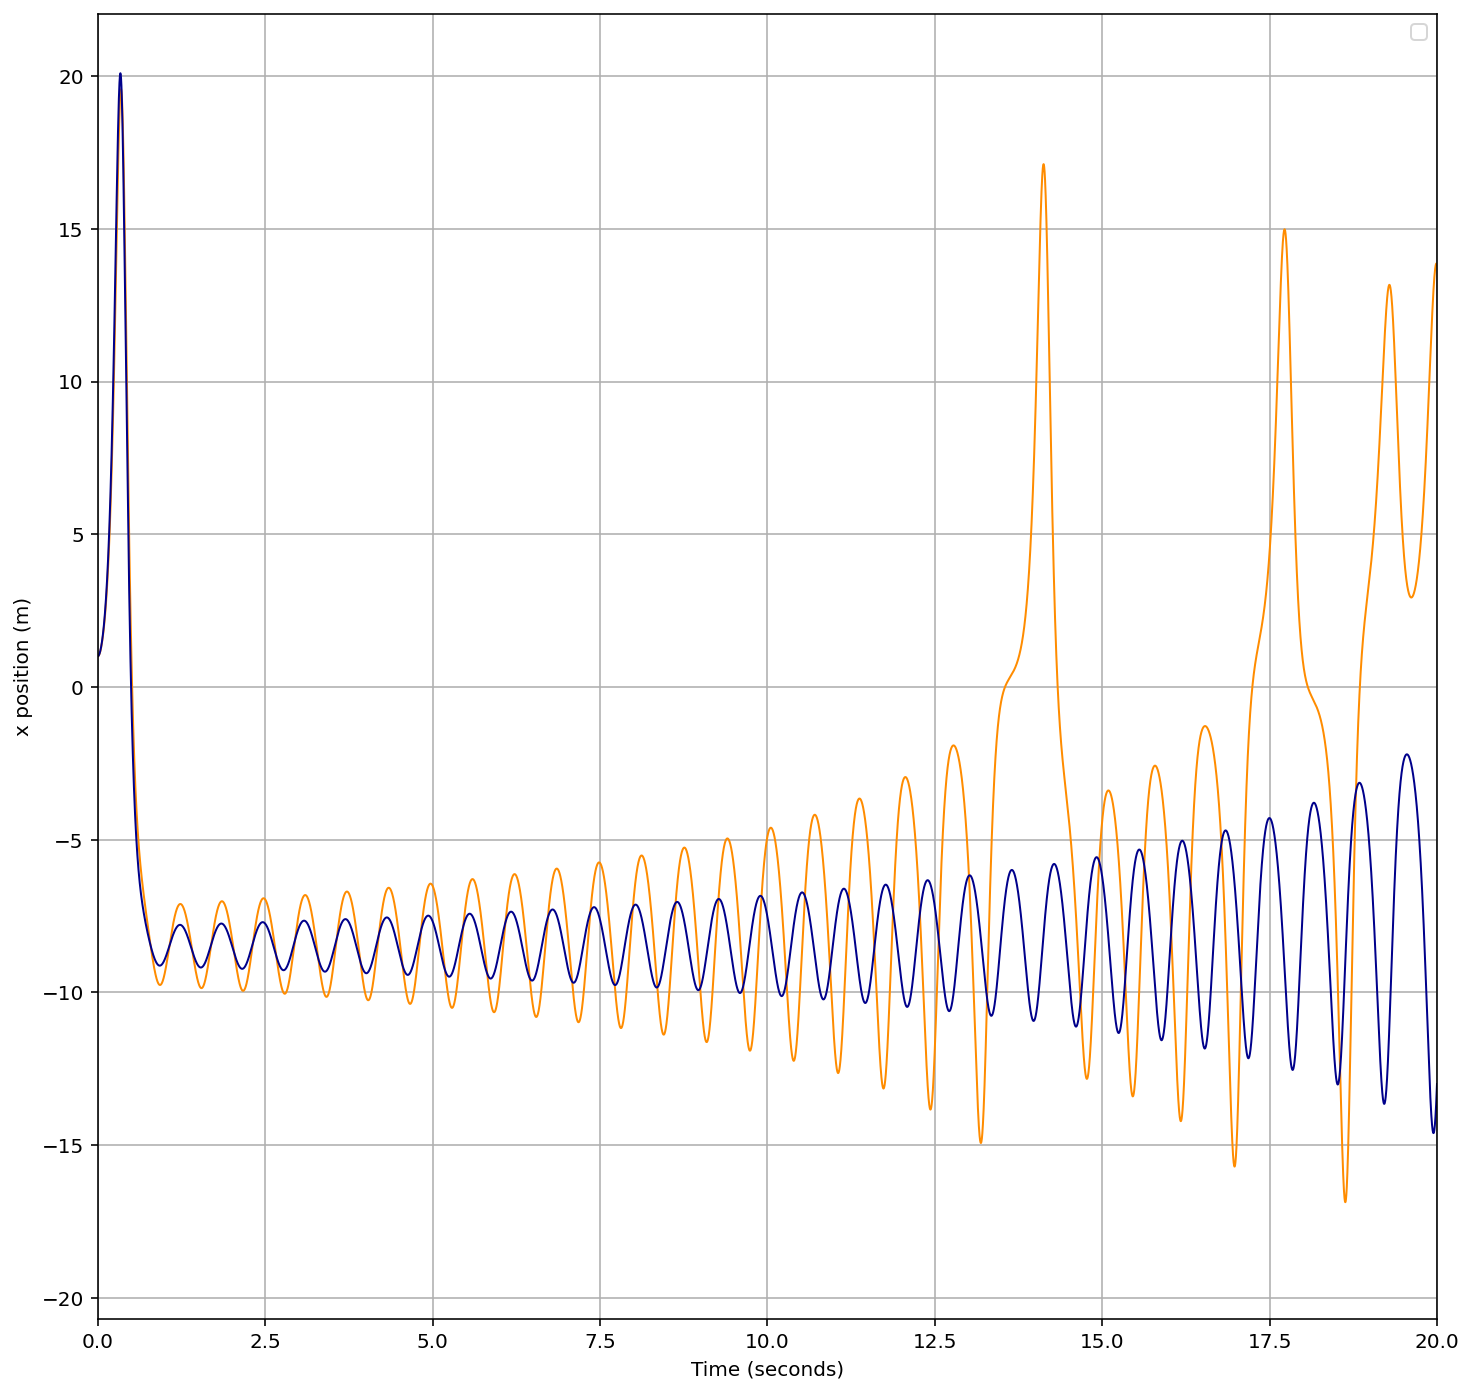

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/tmp/ipykernel_867/2615107455.py:62: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimise" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('yPositions.png', optimise = True)


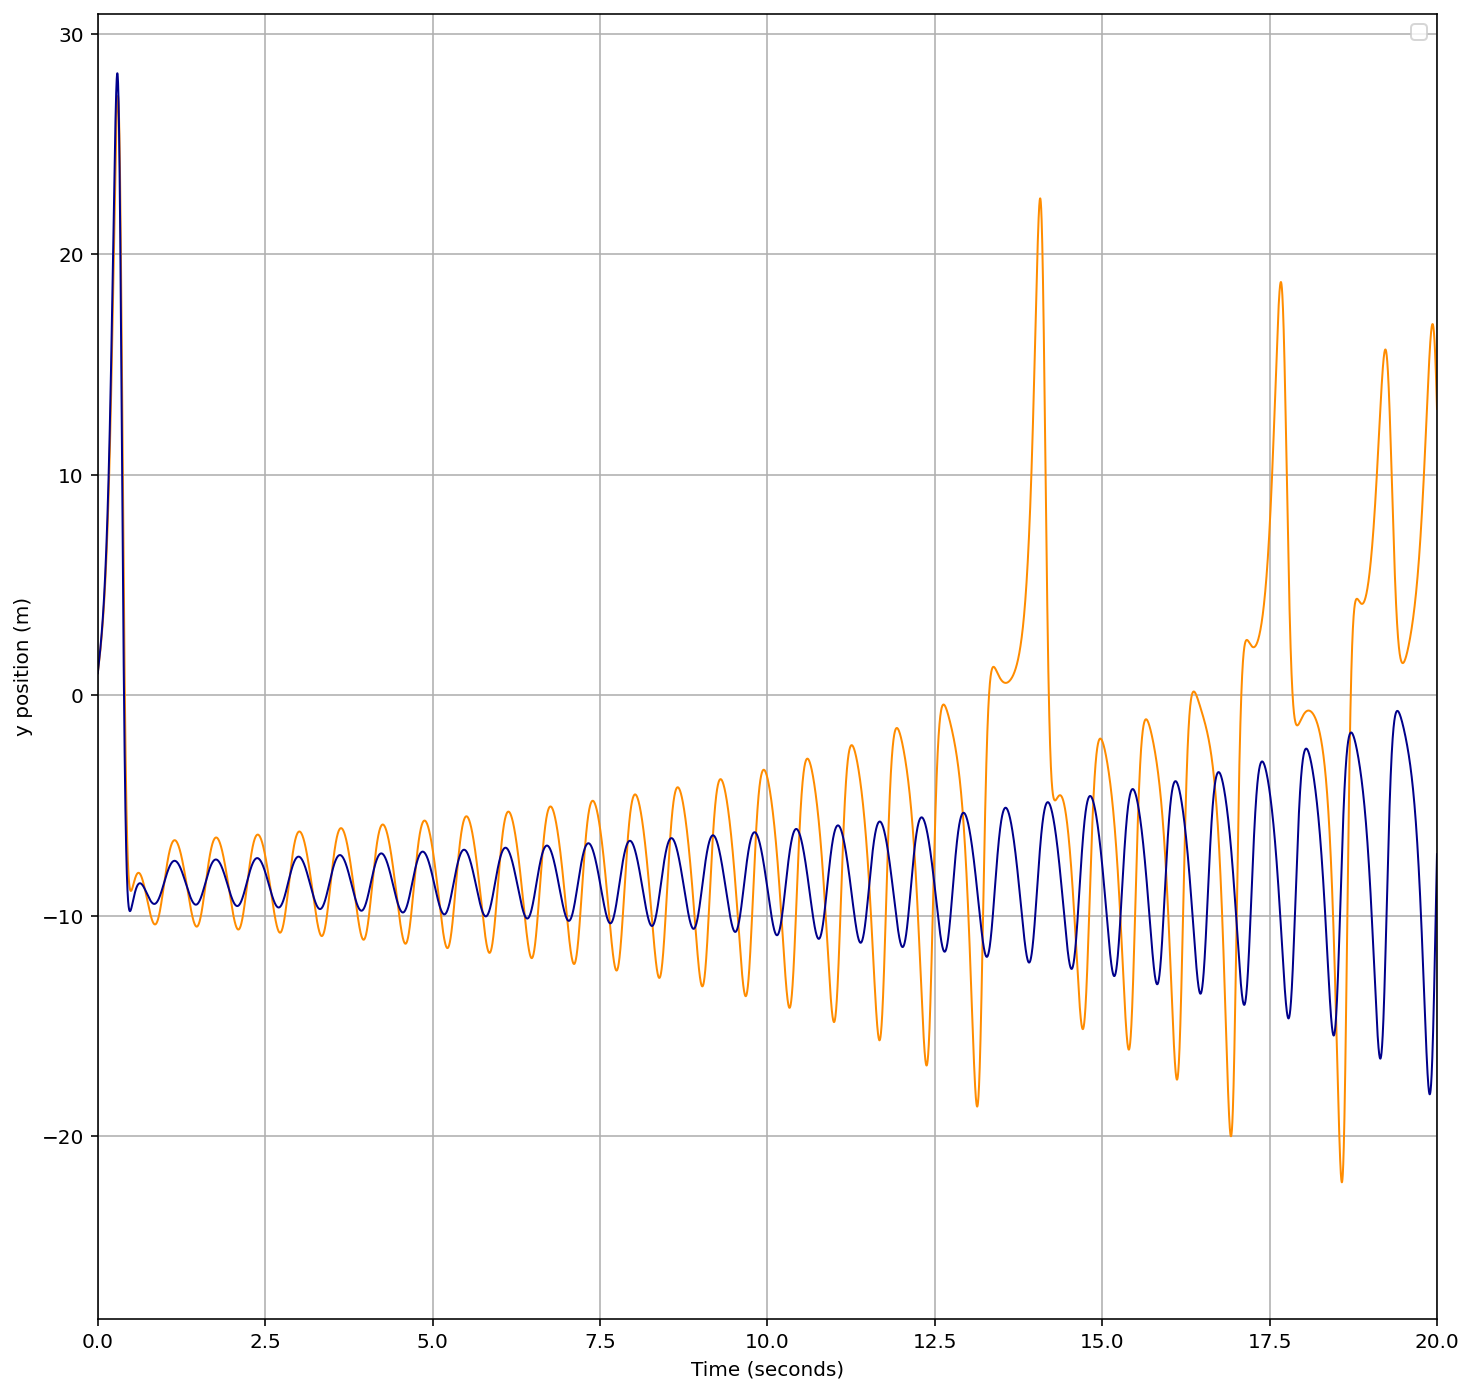

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


/tmp/ipykernel_867/2615107455.py:73: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimise" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('zPositions.png', optimise = True)


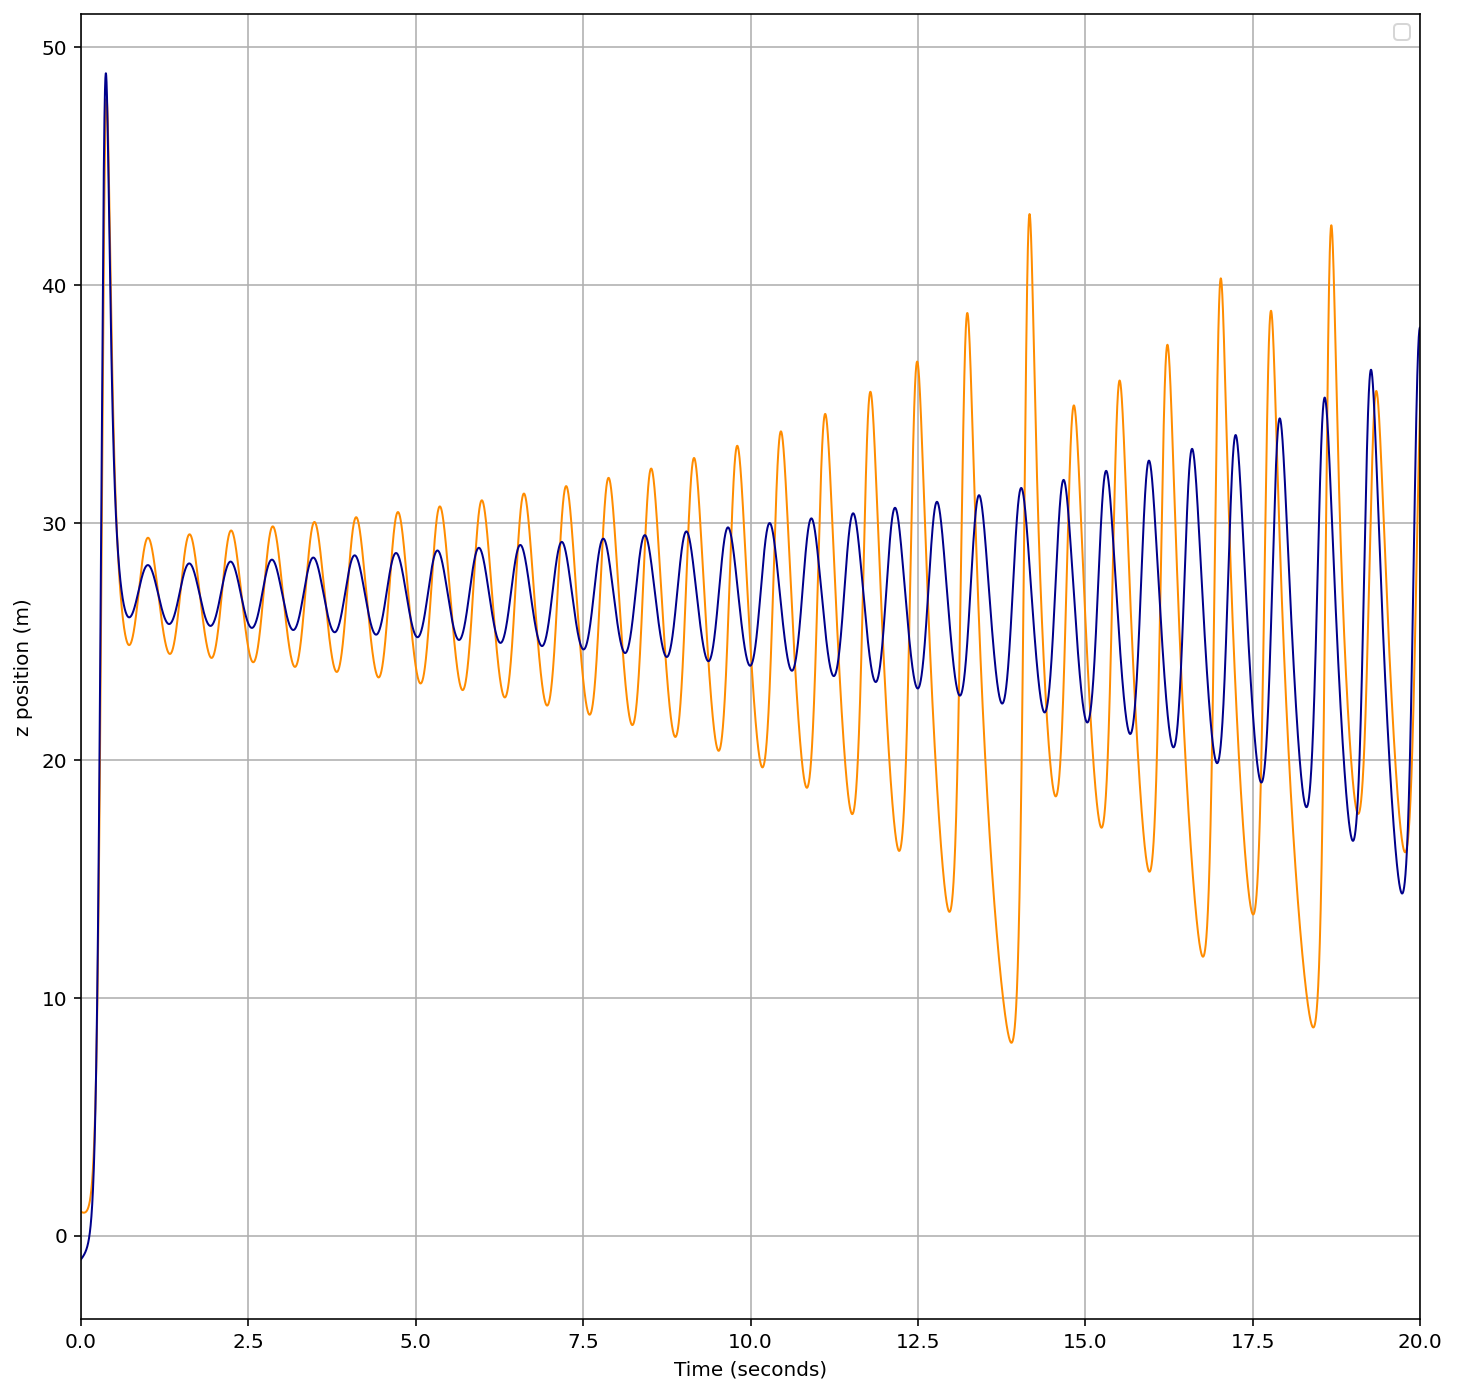

In [5]:
import time
startTime = time.time()

from scipy.integrate import odeint
from matplotlib import animation

sigma = 10
rho = 28
beta = 8/3

pos_init1 = [1.0, 1.0, 1.0]
pos_init2 = [1.0, 1.0, -1.0]       #Defining the initial positions of the 2 'particles'#
t = np.linspace(0, 100, 100000)

def Traj(init, t):
    x, y, z = init
    return sigma * (y - x), (x*(rho-z))-y, (x*y)-(beta*z)             #Defining the L.A differential equations which are to be solved#

positions1 = odeint(Traj, pos_init1, t)                              #Solving D.Es using odeint method#
positions2 = odeint(Traj, pos_init2, t)

fig = plt.figure(figsize = [12, 12])
ax = fig.gca(projection = "3d")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.grid(False)

ax.plot(positions1[:, 0], positions1[:, 1], positions1[:, 2], alpha = 1, color = 'darkorange', linewidth = 1)
#ax.plot(positions2[:, 0], positions2[:, 1], positions2[:, 2], alpha = 1, color = 'darkblue', linewidth = 1)
ax.plot(positions1[0, 0], positions1[0, 1], positions1[0, 2], marker = '.', color = 'darkorange')
#ax.plot(positions2[0, 0], positions2[0, 1], positions2[0, 2],ed marker = '.', color = 'darkblue')
#ax.plot(positions1[3999, 0], positions1[3999, 1], positions1[3999, 2], marker = '.', color = 'red')
#ax.plot(positions2[3999, 0], positions2[3999, 1], positions2[3999, 2], marker = '.', color = 'black')
#plt.draw()
plt.show()
print(positions1[3999, 0], positions1[3999, 1], positions1[3999, 2])
print(positions2[3999, 0], positions2[3999, 1], positions2[3999, 2])
#fig.savefig('odeint.png', optimise = True)

print("Time to execute", (time.time() - startTime), "Seconds")              #Calculates run time#

fig3 = plt.figure(figsize = [12, 12])
plt.xlabel('Time (seconds)')
plt.ylabel('x position (m)')
plt.grid(True)
plt.plot(t, positions1[:, 0], alpha = 1, color = 'darkorange', linewidth = 1)
plt.plot(t, positions2[:, 0], alpha = 1, color = 'darkblue', linewidth = 1)                #Graph of x component vs time#
plt.xlim(0, 20)
plt.legend()
plt.savefig('xPositions.png', optimise = True)
plt.show()

fig4 = plt.figure(figsize = [12, 12])
plt.xlabel('Time (seconds)')
plt.ylabel('y position (m)')
plt.grid(True)
plt.plot(t, positions1[:, 1], alpha = 1, color = 'darkorange', linewidth = 1)
plt.plot(t, positions2[:, 1], alpha = 1, color = 'darkblue', linewidth = 1)                #Graph of y component vs time#
plt.xlim(0, 20)
plt.legend()
plt.savefig('yPositions.png', optimise = True)
plt.show()

fig5 = plt.figure(figsize = [12, 12])
plt.xlabel('Time (seconds)')
plt.ylabel('z position (m)')
plt.grid(True)
plt.plot(t, positions1[:, 2], alpha = 1, color = 'darkorange', linewidth = 1)
plt.plot(t, positions2[:, 2], alpha = 1, color = 'darkblue', linewidth = 1)                #Graph of y component vs time#
plt.xlim(0, 20)
plt.legend()
plt.savefig('zPositions.png', optimise = True)
plt.show()



### Runge-kutta method 

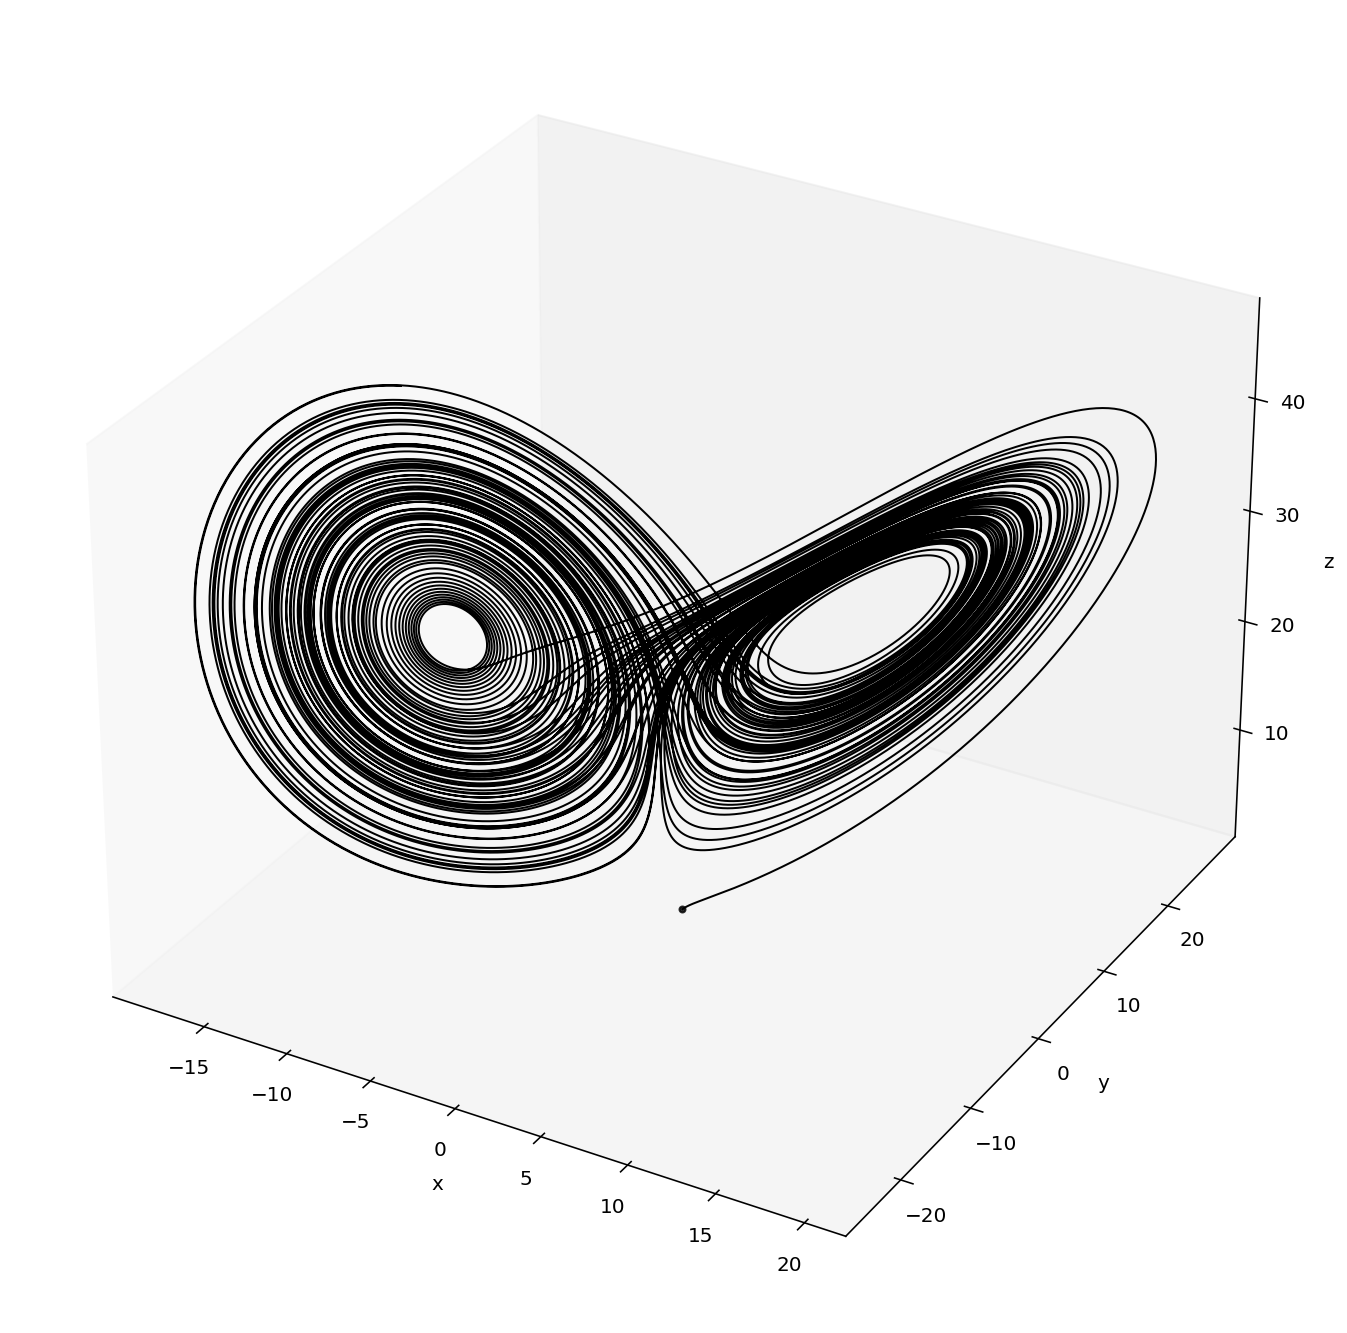

Time to execute 1.6527690887451172 Seconds


In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

startTime2 = time.time()

h = 0.001
x = 1.0
y = 1.0
z = 1.0

t = np.arange(0, 100, h)
#print(t)

sigma = 10
rho = 28
beta = 8/3

def dxdt(t, x, y, z): 
    return sigma*(y - x)
def dydt(t, x, y, z): 
    return (x*(rho - z)) - y          #Defining the dx/dt, dy/dt, dz/dt differential equations to solve#
def dzdt(t, x, y, z): 
    return (x*y) - (beta*z)

xStored = []                         #Empty lists defined to store the x, y and z positions#
yStored = []
zStored = []
for t in range(0, len(t)):
    
    k1 = dxdt(t, x, y, z)
    l1 = dydt(t, x, y, z)
    m1 = dzdt(t, x, y, z)
    
    k2 = dxdt(t + h/2, x + (0.5*k1*h), y + (0.5*l1*h), z + (0.5*m1*h))
    l2 = dydt(t + h/2, x + (0.5*k1*h), y + (0.5*l1*h), z + (0.5*m1*h))
    m2 = dzdt(t + h/2, x + (0.5*k1*h), y + (0.5*l1*h), z + (0.5*m1*h))
    
    k3 = dxdt(t + h/2, x + (0.5*k2*h), y + (0.5*l2*h), z + (0.5*m2*h))            #Calculating the estimates for the slope#
    l3 = dydt(t + h/2, x + (0.5*k2*h), y + (0.5*l2*h), z + (0.5*m2*h))
    m3 = dzdt(t + h/2, x + (0.5*k2*h), y + (0.5*l2*h), z + (0.5*m2*h))
    
    k4 = dxdt(t + h, x + k3*h, y + l3*h, z + m3*h)
    l4 = dydt(t + h, x + k3*h, y + l3*h, z + m3*h)
    m4 = dzdt(t + h, x + k3*h, y + l3*h, z + m3*h)
    
    x = x + h*(1/6)*(k1+ 2*k2 + 2*k3 + k4)                           #Calculation of each x, y, z component of simulation#
    y = y + h*(1/6)*(l1+ 2*l2 + 2*l3 + l4)
    z = z + h*(1/6)*(m1+ 2*m2 + 2*m3 + m4)
    
    #print(t, x, y, z) 
    xStored.append(x)
    yStored.append(y)
    zStored.append(z)                            #Fills the empty array with the calculated x, y, z values#
    t+=h

fig2 = plt.figure(figsize = [12, 12])
ax2 = fig2.add_subplot(111, projection='3d')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.grid(False)
ax2.plot(xStored, yStored, zStored, alpha = 1, color = 'black', linewidth = 1) #Plots the trajectories of the Lorenz Attractor System#
ax2.plot(1, 1, 1, alpha = 0.8, color = 'black', marker = '.')
plt.show();
#fig2.savefig('RungeKutta.png', optimise = True)

print("Time to execute", (time.time() - startTime2), "Seconds")    #Calculates and prints the total run-time of the cell#


